In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torchvision.transforms import transforms

from tqdm import tqdm

from random import shuffle

/home/fxw/.conda/envs/naka/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Data

In [2]:
file_name = "data/NIR_all.xlsx"
xl_file = pd.ExcelFile(file_name)

df = xl_file.parse("Sheet1")



labels = []
data = []

skip = True
for column in df:
    if skip:
        skip = False
        continue
        
    n_label = df[column].name.split(": ")[0]
    if n_label != "Unnamed":
        label = n_label
    
    labels.append(label)
    data.append(np.array(df[column].values, dtype=np.float32))
    
    
counter = 0
classes = dict()
for l in labels:
    if l not in classes:
        classes[l] = counter
        classes[counter] = l
        counter += 1
        

labels_ohe = np.eye(len(classes) // 2, dtype=np.float32)[[classes[l] for l in labels]]

data_tensor = torch.tensor(data)
labels_tensor = torch.tensor(np.array([classes[l] for l in labels]))

inds = [i for i in range(len(data))]
# random shuffle
shuffle(inds)

training_tensor = torch.reshape(data_tensor[inds][:-40], (-1, 1, 512))
training_labels = labels_tensor[inds][:-40]

validation_tensor = torch.reshape(data_tensor[inds][-40:], (-1, 1, 512))
validation_labels = labels_tensor[inds][-40:]

training_set = torch.utils.data.TensorDataset(training_tensor, training_labels)
validation_set = torch.utils.data.TensorDataset(validation_tensor, validation_labels)

/tmp/ipykernel_472748/616300057.py:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  data_tensor = torch.tensor(data)


In [3]:
data_tensor.shape

torch.Size([180, 512])

## Reflexionsspektroskopie

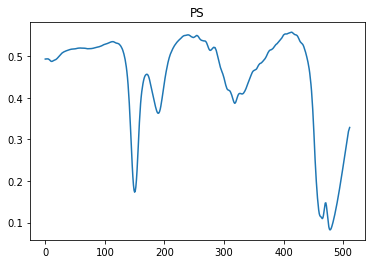

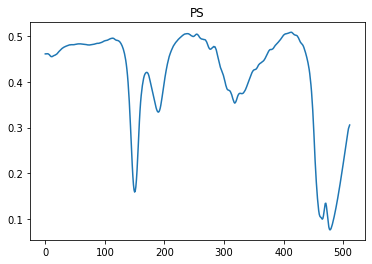

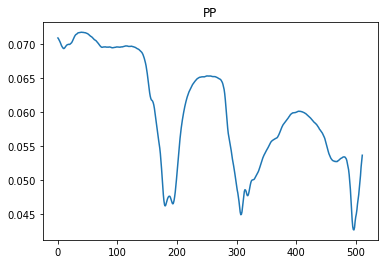

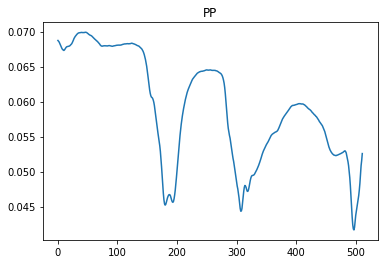

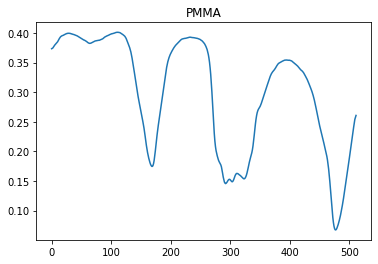

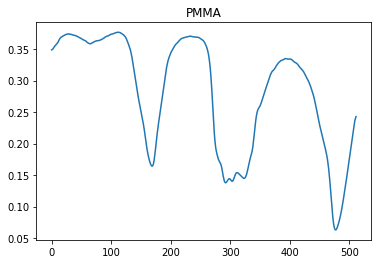

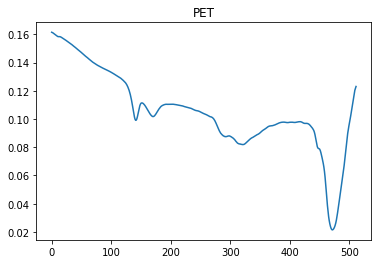

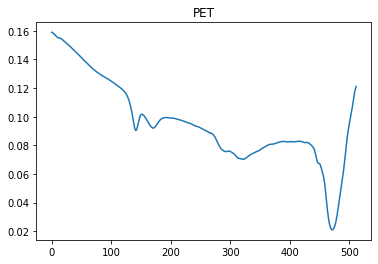

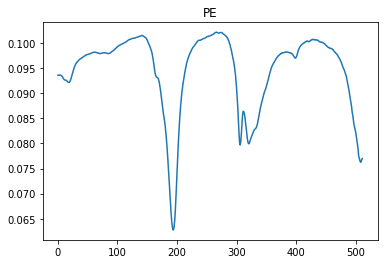

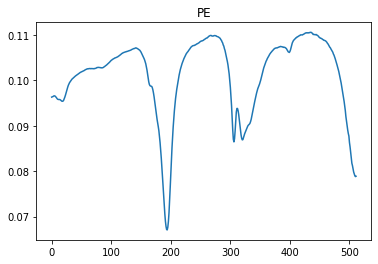

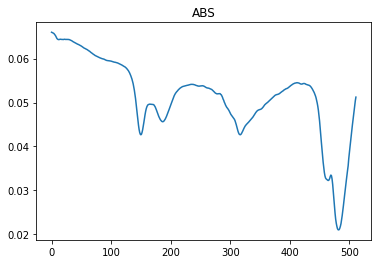

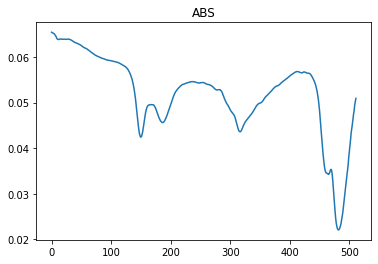

In [4]:
for i in range(0, data_tensor.shape[0], 15):
    plt.plot(data_tensor[i, :])
    plt.title(labels[i])
    plt.show()

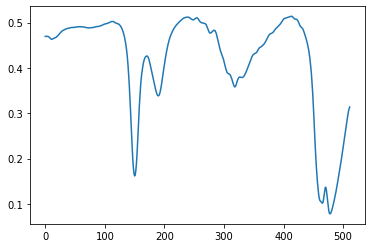

In [5]:
plt.plot(data_tensor[1, :])

# Bau Dein Netzwerk!